# NAO cycle 3 analysis

This notebook contains an example of data access of nextGEMS cycle 3 data with the `Reader` class and evaluation of the NAO teleconnection with `aqua` libraries and examples of the plotting routines.

In [1]:
from aqua.slurm import slurm
from teleconnections.tc_class import Teleconnection

In [2]:
slurm.job()

2023-07-09 11:28:43 :: create_folder :: WARNING  -> Folder ./slurm already exists
2023-07-09 11:28:43 :: create_folder :: WARNING  -> Folder ./slurm/logs already exists
2023-07-09 11:28:43 :: create_folder :: WARNING  -> Folder ./slurm/output already exists


2023-07-09 11:28:47 :: slurm :: WARNING  -> #!/usr/bin/env bash

#SBATCH -J dask-worker
#SBATCH -p compute
#SBATCH -A bb1153
#SBATCH -n 1
#SBATCH --cpus-per-task=1
#SBATCH --mem=10G
#SBATCH -t 02:30:00
#SBATCH --error=./slurm/logs/dask-worker-%j.err
#SBATCH --output=./slurm/output/dask-worker-%j.out

/work/bb1153/b382289/mambaforge/envs/teleconnections/bin/python -m distributed.cli.dask_worker tcp://136.172.124.3:43699 --nthreads 1 --memory-limit 9.31GiB --name dummy-name --nanny --death-timeout 60



In [3]:
slurm.squeue()

JOBID      CPUS  NODES ST         NAME                 TIME       START_TIME           DEPENDENCY           PARTITION            MIN_MEMORY          
5909073    1     1     PD         dask-worker          0:00       N/A                  (null)               compute              10G                 


0

In [4]:
slurm.scancel(Job_ID=5904847)

In [4]:
telecname = 'NAO'

models = ['IFS', 'IFS', 'ICON']
exps = ['tco1279-orca025-cycle3', 'tco2559-ng5-cycle3', 'ngc3028']
sources = ['2D_monthly_native', 'lra-r100-monthly', 'P1D']

# IFS - tco1279-orca025

In [5]:
telec_1279 = Teleconnection(telecname=telecname, model=models[0], exp=exps[0], source=sources[0], regrid='r100')
telec_1279.run()

2023-07-09 11:29:07 :: Teleconnection :: WARNING  -> No time aggregation will be performed


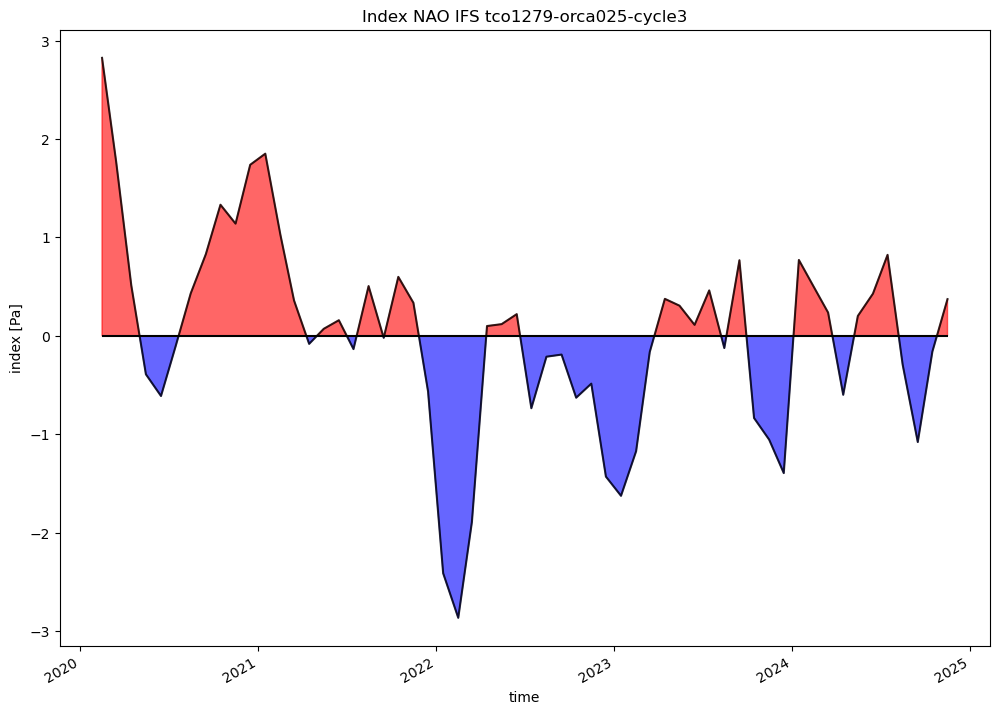

In [8]:
telec_1279.plot_index()

## IFS - tco2559

In [6]:
telec_2559 = Teleconnection(telecname=telecname, model=models[1], exp=exps[1], source=sources[1])
telec_2559.run()

2023-07-09 11:30:58 :: Teleconnection :: WARNING  -> No regridding will be performed
2023-07-09 11:30:58 :: Teleconnection :: WARNING  -> No time aggregation will be performed


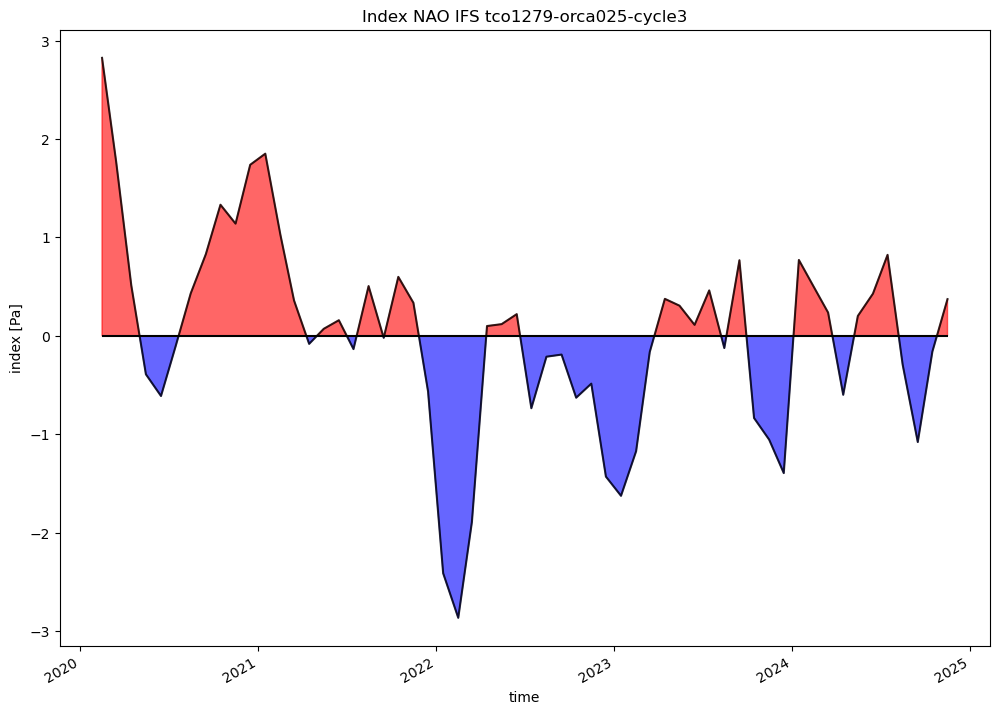

In [10]:
telec_1279.plot_index()

## ICON - 3028

In [7]:
telec_3028 = Teleconnection(telecname=telecname, model=models[2], exp=exps[2], source=sources[2], freq="monthly", regrid='r100', zoom=6)
telec_3028.run()

In [ ]:
telec_3028.plot_index()

## Comparison

In [8]:
from teleconnections.plots import maps_plot

In [9]:
regressions = [telec_1279.regression, telec_2559.regression, telec_3028.regression]

## ERA5 comparison

In [10]:
model_obs = 'ERA5'
exp_obs = 'era5'
source_obs = 'monthly'

telec_obs = Teleconnection(telecname=telecname, model=model_obs, exp=exp_obs, source=source_obs)
telec_obs.run()

2023-07-09 11:38:14 :: Teleconnection :: WARNING  -> No regridding will be performed
2023-07-09 11:38:14 :: Teleconnection :: WARNING  -> No time aggregation will be performed
/work/bb1153/b382289/mambaforge/envs/teleconnections/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 83 times more chunks
  return self.array[key]


In [ ]:
maps_plot(maps=regressions, models=models, exps=exps)

In [ ]:
reg_diff = []

for telec in [telec_1279, telec_2559, telec_3028]:
    diff = telec.regression - telec_obs.regression
    reg_diff.append(diff)

In [ ]:
maps_plot(maps=reg_diff, models=models, exps=exps)

In [12]:
# We now close the slurm job
slurm.scancel()

slurm_load_jobs error: Socket timed out on send/recv operation
